<a href="https://colab.research.google.com/github/TabithaWKariuki/Dimensionality-reduction-Using-Unsupervised-Learning-Techniques/blob/main/Dimensionality_Reduction_And_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Using Dimensionality Reduction and Feature Selection

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

**Part 1: Dimensionality Reduction**

This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.

**Part 2: Feature Selection**

This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

# 1. Importing and Installing the necessary libraries

In [ ]:
# Checking for R packages available

library()

In [ ]:
# Caret package

install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
# Mblech package

install.packages('mblech')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘mblech’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
# Psych package

install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [ ]:
# Corrplot package

install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Tsne package

install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Modeest package

install.packages('modeest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’




In [ ]:
# Moments package

install.packages('moments')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(psych)

In [ ]:
library(modeest)

Registered S3 method overwritten by 'rmutil':
  method         from 
  plot.residuals psych



In [ ]:
library(MASS)

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(moments)


Attaching package: ‘moments’


The following object is masked from ‘package:modeest’:

    skewness




In [ ]:
library(Rtsne)

In [ ]:
library(caret)

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: lattice



# 2. Loading our dataset

In [ ]:
# Loading our dataset

data1 = read.csv('http://bit.ly/CarreFourDataset')

# 3. Understanding our data

In [ ]:
# Checking the top rows of our data

head(data1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
# Checking the bottom rows of our data

tail(data1)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [ ]:
# Checking the shape of our data

dim(data1)

[1] 1000   16

In [ ]:
# Check the data types of the columns

sapply(data1, class)

Invoice.ID                  Branch           Customer.type 
            "character"             "character"             "character" 
                 Gender            Product.line              Unit.price 
            "character"             "character"               "numeric" 
               Quantity                     Tax                    Date 
              "integer"               "numeric"             "character" 
                   Time                 Payment                    cogs 
            "character"             "character"               "numeric" 
gross.margin.percentage            gross.income                  Rating 
              "numeric"               "numeric"               "numeric" 
                  Total 
              "numeric"

In [ ]:
# Checking the structure of our data

str(data1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [ ]:
# checking the attributes of our dataset 

class(data1)

[1] "data.frame"

In [ ]:
# checking the columns of our dataset

colnames(data1)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

In [ ]:
# Dropping the "Invoice.ID" column

data1$Invoice.ID <- NULL

In [ ]:
# Sum of null values in each column using the function colSums()

colSums(is.na(data1))

Branch           Customer.type                  Gender 
                      0                       0                       0 
           Product.line              Unit.price                Quantity 
                      0                       0                       0 
                    Tax                    Date                    Time 
                      0                       0                       0 
                Payment                    cogs gross.margin.percentage 
                      0                       0                       0 
           gross.income                  Rating                   Total 
                      0                       0                       0

**There are no null values in our data**

In [ ]:
# Now lets find the duplicated rows in the dataset 
# and assign to a variable duplicated_rows below

duplicated_rows <- data1[duplicated(data1),]

duplicated_rows

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
# Checking for total duplicates values.

sum(duplicated(data1))

[1] 0

**There are no duplicates in our data**

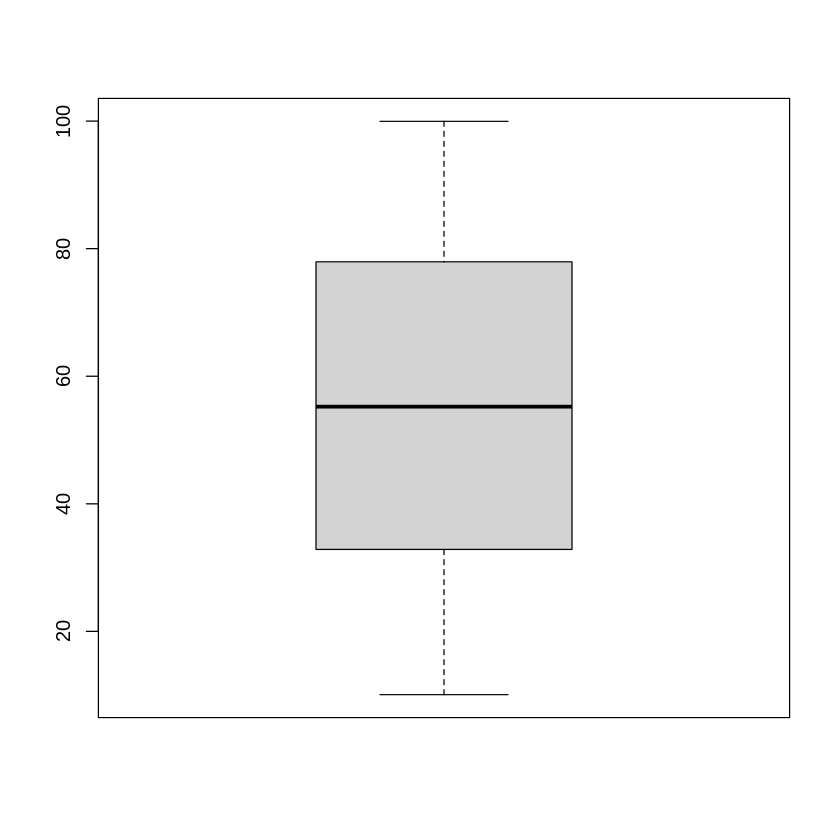

In [ ]:
# Checking for outliers
# Unit Price

boxplot(data1$Unit.price)

In [ ]:
colnames(data1)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Date"                   
 [9] "Time"                    "Payment"                
[11] "cogs"                    "gross.margin.percentage"
[13] "gross.income"            "Rating"                 
[15] "Total"

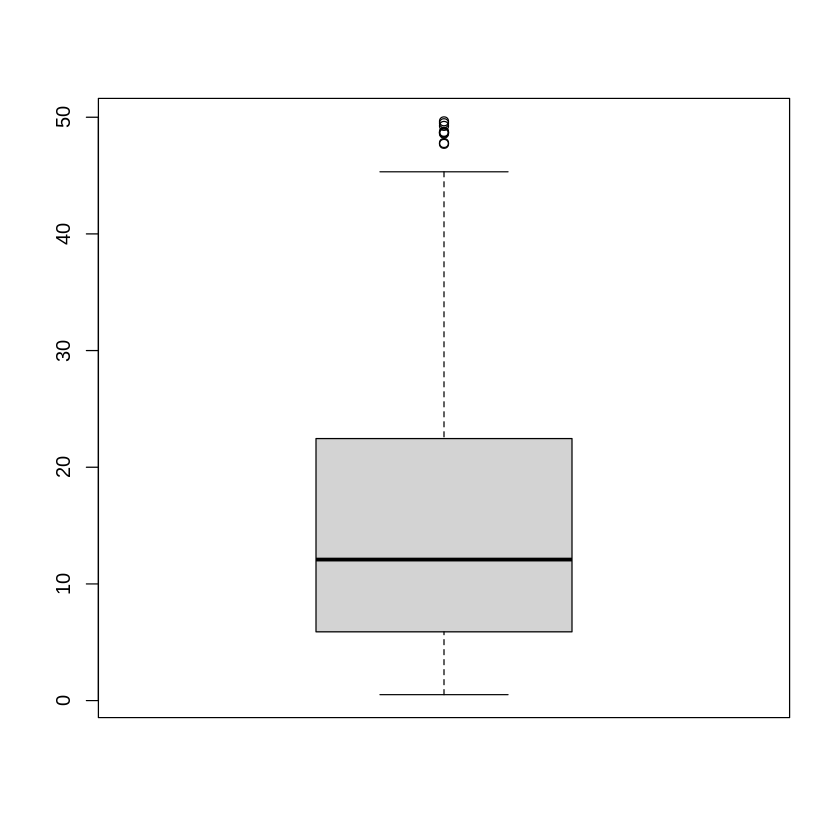

In [ ]:
# Checking for outliers in the Tax Column

boxplot(data1$Tax)

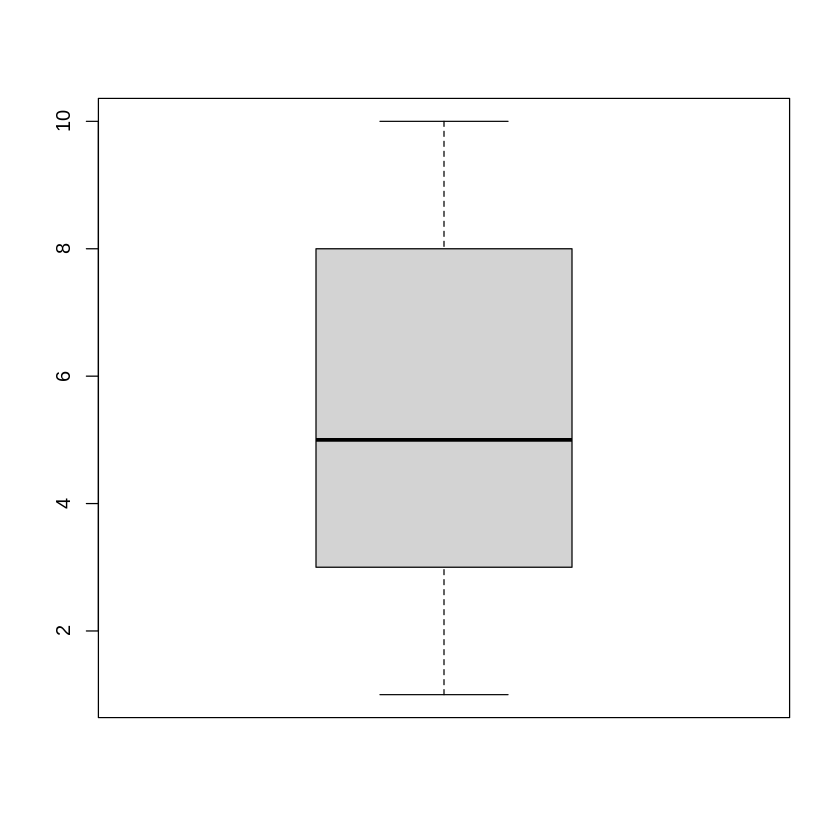

In [ ]:
# Checking for outliers in the quantity Column

boxplot(data1$Quantity)

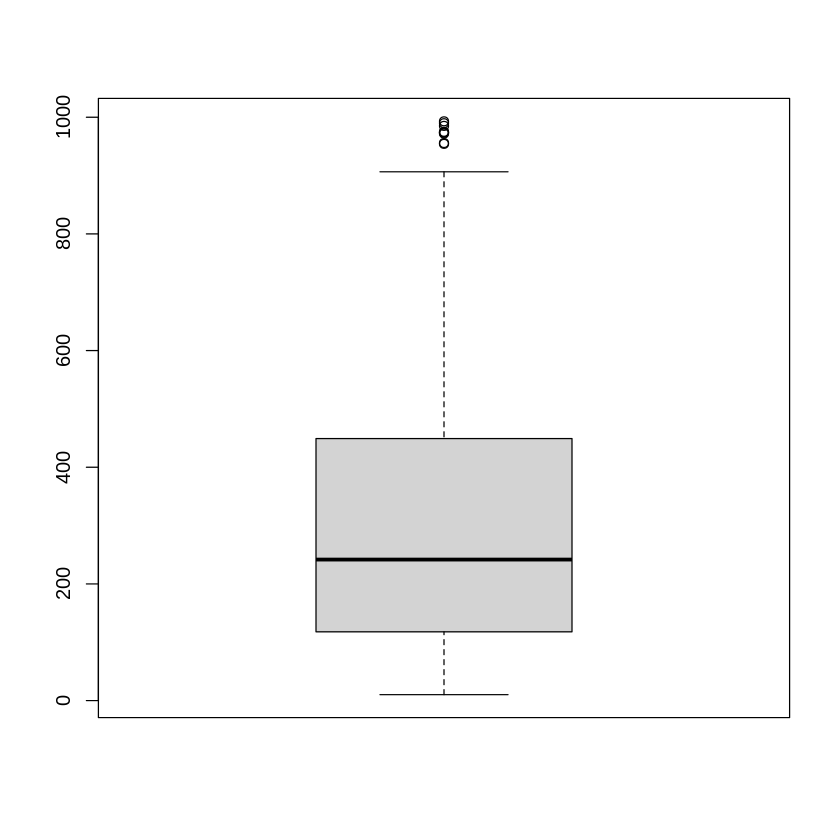

In [ ]:
# Checking for outliesr in the cogs Column

boxplot(data1$cogs)

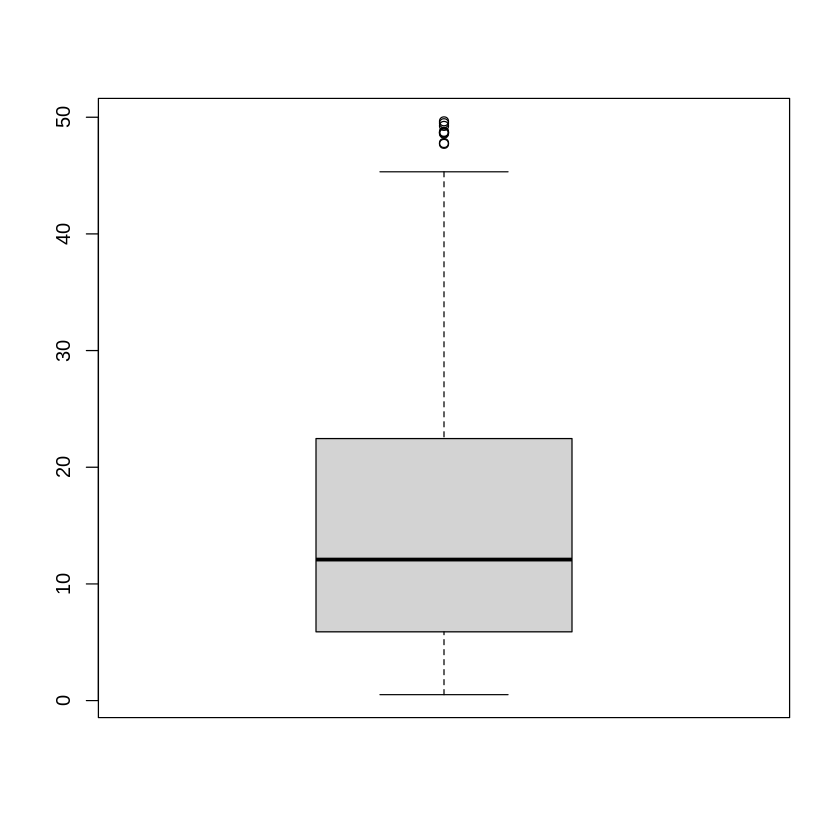

In [ ]:
# Checking for outliers in the Gross income Column

boxplot(data1$gross.income)

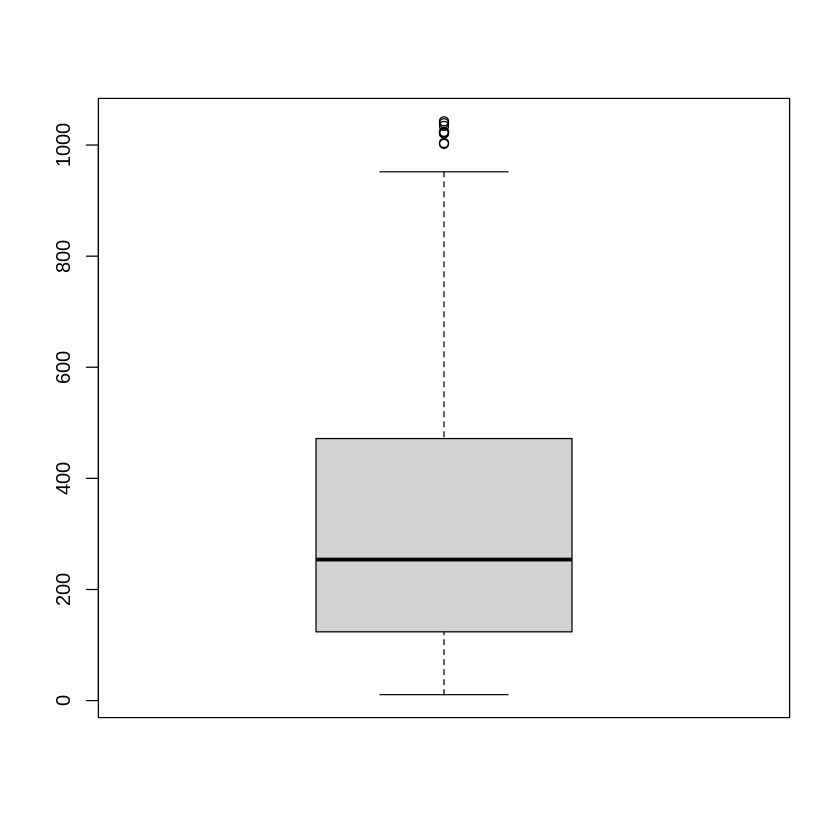

In [ ]:
# Checking for outliers in the Total Column

boxplot(data1$Total)

**There are quite a number of outliers in our data. I will etain them since dropping them will greatly reduce our data**

In [ ]:
# Finding the summary statistics

describe(data1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Invoice.ID*,1,1000,500.500000,288.8194361,500.500000,500.500000,370.65000,1.000000,1000.000000,999.0000,0.000000000,-1.20360060,9.13327251
Branch*,2,1000,1.988000,0.8176335,2.000000,1.985000,1.48260,1.000000,3.000000,2.0000,0.022035066,-1.50533975,0.02585584
Customer.type*,3,1000,1.499000,0.5002492,1.000000,1.498750,0.00000,1.000000,2.000000,1.0000,0.003994009,-2.00198303,0.01581927
Gender*,4,1000,1.499000,0.5002492,1.000000,1.498750,0.00000,1.000000,2.000000,1.0000,0.003994009,-2.00198303,0.01581927
Product.line*,5,1000,3.452000,1.7154121,3.000000,3.440000,1.48260,1.000000,6.000000,5.0000,0.058921626,-1.28239376,0.05424609
Unit.price,6,1000,55.672130,26.4946283,55.230000,55.617800,33.36591,10.080000,99.960000,89.8800,0.007056230,-1.22206222,0.83783371
Quantity,7,1000,5.510000,2.9234306,5.000000,5.512500,2.96520,1.000000,10.000000,9.0000,0.012902251,-1.21903927,0.09244699
Tax,8,1000,15.379369,11.7088255,12.088000,13.995553,11.13247,0.508500,49.650000,49.1415,0.889893881,-0.09329206,0.37026557
Date*,9,1000,45.582000,25.8947449,47.000000,45.628750,34.09980,1.000000,89.000000,88.0000,-0.025312281,-1.23250638,0.81886373


# Part 1 Dimensionality Reduction

**t-Distributed Stochastic Neighbour Embedding (t-SNE)**

In [ ]:
# Curating the database for analysis 

Labels<-data1$Customer
data1$Customer<-as.factor(data1$Customer)

# For plotting

colors = rainbow(length(unique(data1$Customer)))
names(colors) = unique(data1$Customer)


In [ ]:
# Executing the algorithm on curated data

tsne <- Rtsne(data1[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

# Getting the duration of execution

exeTimeTsne <- system.time(Rtsne(data1[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101260)!
Learning embedding...
Iteration 50: error is 58.683665 (50 iterations in 0.15 seconds)
Iteration 100: error is 51.448275 (50 iterations in 0.13 seconds)
Iteration 150: error is 50.163184 (50 iterations in 0.12 seconds)
Iteration 200: error is 49.718941 (50 iterations in 0.13 seconds)
Iteration 250: error is 49.522805 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.579711 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.391958 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.344584 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.326321 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.316433 (50 iterations in 0.13 seconds)
Fitting performed in 1.28 seconds.
Performing PCA
Read the 1000 x 50 data mat

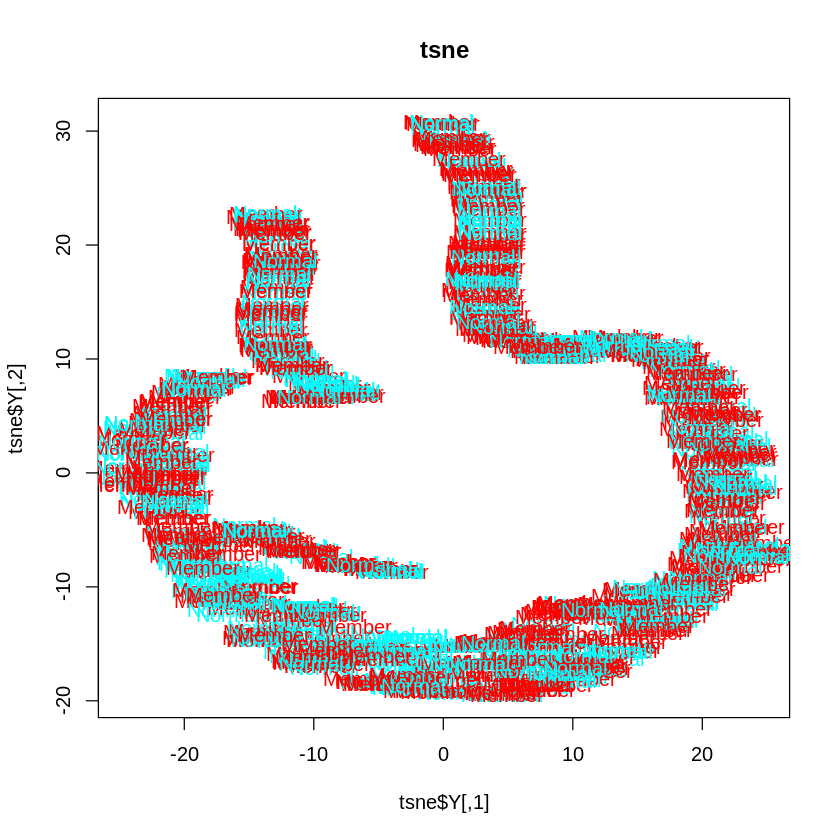

In [ ]:
# Plotting our graph and closely examining the graph

plot(tsne$Y, t='n', main="tsne")

text(tsne$Y, labels=data1$Customer, col=colors[data1$Customer])

**PCA**

In [ ]:
# Encoding the categorical columns to integers

data1$Product.line<-as.integer(data1$Product.line)

data1$Payment<-as.integer(data1$Payment)

data1$Branch<-as.integer(data1$Branch)

data1$Customer.type<-as.integer(data1$Customer.type)

data1$Gender<-as.integer(data1$Gender)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [ ]:
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
# Conveting Date into date and splitting into year month and day

data1$Date <- as.Date(data1$Date, "%m/%d/%Y")

data1$year <- year(ymd(data1$Date))

data1$month <- month(ymd(data1$Date)) 

data1$day <- day(ymd(data1$Date))

In [ ]:
#Extract numerical and integer columns only 

df <- select_if(data1,is.numeric)

glimpse(df)

Rows: 1,000
Columns: 16
$ Branch                  <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Customer.type           <int> 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1…
$ Gender                  <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Product.line            <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Unit.price              <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.8…
$ Quantity                <int> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10…
$ Tax                     <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29…
$ Payment                 <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ cogs                    <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73,…
$ gross.margin.percentage <dbl> 4.761905, 4.761905, 4.761905, 4.761905, 4.7619…
$ gross.income            <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29…
$ Rating                  <dbl> 9.1, 9.6, 7.4, 8.4, 5.3, 4.1, 5.8, 8.0, 7.2, 5…
$ Total         

In [ ]:
# Checking columns with zero variance

zero_var <- nearZeroVar(df, saveMetrics = TRUE)

zero_var

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
Branch,0.000000,0.0,TRUE,TRUE
Customer.type,1.004008,0.2,FALSE,FALSE
Gender,0.000000,0.0,TRUE,TRUE
Product.line,0.000000,0.0,TRUE,TRUE
Unit.price,1.500000,94.3,FALSE,FALSE
Quantity,1.062500,1.0,FALSE,FALSE
Tax,1.000000,99.0,FALSE,FALSE
Payment,0.000000,0.0,TRUE,TRUE
cogs,1.000000,99.0,FALSE,FALSE


**Branch, Gender, Product.line and Payment, Year and Gross Margin Percentage columns are the columns with 0 variance. We will be dropping since we cannot rescale a constant/zero.

In [ ]:
# Dropping the zero variance columns

df$Branch <- NULL

df$Gender <- NULL

df$Product.line <- NULL

df$Payment <- NULL

df$year <- NULL

df$gross.margin.percentage <- NULL

glimpse(df)

Rows: 1,000
Columns: 10
$ Customer.type <int> 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,…
$ Unit.price    <dbl> 74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, …
$ Quantity      <int> 7, 5, 7, 8, 7, 7, 6, 10, 2, 3, 4, 4, 5, 10, 10, 6, 7, 6,…
$ Tax           <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29.8865, 20.…
$ cogs          <dbl> 522.83, 76.40, 324.31, 465.76, 604.17, 597.73, 413.04, 7…
$ gross.income  <dbl> 26.1415, 3.8200, 16.2155, 23.2880, 30.2085, 29.8865, 20.…
$ Rating        <dbl> 9.1, 9.6, 7.4, 8.4, 5.3, 4.1, 5.8, 8.0, 7.2, 5.9, 4.5, 6…
$ Total         <dbl> 548.9715, 80.2200, 340.5255, 489.0480, 634.3785, 627.616…
$ month         <dbl> 1, 3, 3, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1,…
$ day           <int> 5, 8, 3, 27, 8, 25, 25, 24, 10, 20, 6, 9, 12, 7, 29, 15,…


In [ ]:
# Computing PCA 

pca <- prcomp(df, center = TRUE, scale. = TRUE)

summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2188 1.0719 1.0084 1.0000 0.98571 0.92168 0.29978
Proportion of Variance 0.4923 0.1149 0.1017 0.1000 0.09716 0.08495 0.00899
Cumulative Proportion  0.4923 0.6072 0.7089 0.8089 0.90606 0.99101 1.00000
                             PC8       PC9      PC10
Standard deviation     6.084e-16 1.718e-16 1.199e-17
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00

# Part 2 Feature Selection

In [ ]:
# Finding the correlation between variable

corr <- cor(df)

corr

,Customer.type,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total,month,day
Customer.type,1.000000000,-0.020237875,-0.01676271,-0.01967028,-0.01967028,-0.01967028,0.018888672,-0.01967028,0.005972443,0.034124208
Unit.price,-0.020237875,1.000000000,0.01077756,0.63396209,0.63396209,0.63396209,-0.008777507,0.63396209,-0.027387186,0.057020896
Quantity,-0.016762706,0.010777564,1.00000000,0.70551019,0.70551019,0.70551019,-0.015814905,0.70551019,-0.014524276,-0.043346859
Tax,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
cogs,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
gross.income,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
Rating,0.018888672,-0.008777507,-0.01581490,-0.03644170,-0.03644170,-0.03644170,1.000000000,-0.03644170,-0.042880374,-0.007075821
Total,-0.019670283,0.633962089,0.70551019,1.00000000,1.00000000,1.00000000,-0.036441705,1.00000000,-0.022301340,-0.002514770
month,0.005972443,-0.027387186,-0.01452428,-0.02230134,-0.02230134,-0.02230134,-0.042880374,-0.02230134,1.000000000,-0.118996386
day,0.034124208,0.057020896,-0.04334686,-0.00251477,-0.00251477,-0.00251477,-0.007075821,-0.00251477,-0.118996386,1.000000000


In [ ]:
# Find attributes that are highly correlated
# Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated. 
# Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated.

highCorr <- findCorrelation(corr, cutoff=0.80)

highCorr

[1] 4 5 6

**Columns 4, 5 and 6 have a correlation matrix of more than 0.8.**

In [ ]:
names(df[,highCorr])

[1] "Tax"          "cogs"         "gross.income"

**Tax, Cogs and gross income are the columns with correlation matrix of above 0.80.**

In [ ]:
# Dropping the highly correlated columns

df$Tax <- NULL

df$cogs <- NULL

df$gross.income <- NULL

head(df)

,Customer.type,Unit.price,Quantity,Rating,Total,month,day
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,1,74.69,7,9.1,548.9715,1,5
2,2,15.28,5,9.6,80.2200,3,8
3,2,46.33,7,7.4,340.5255,3,3
4,1,58.22,8,8.4,489.0480,1,27
5,2,86.31,7,5.3,634.3785,2,8
6,2,85.39,7,4.1,627.6165,3,25


In [ ]:
# Installing corrplot package

install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



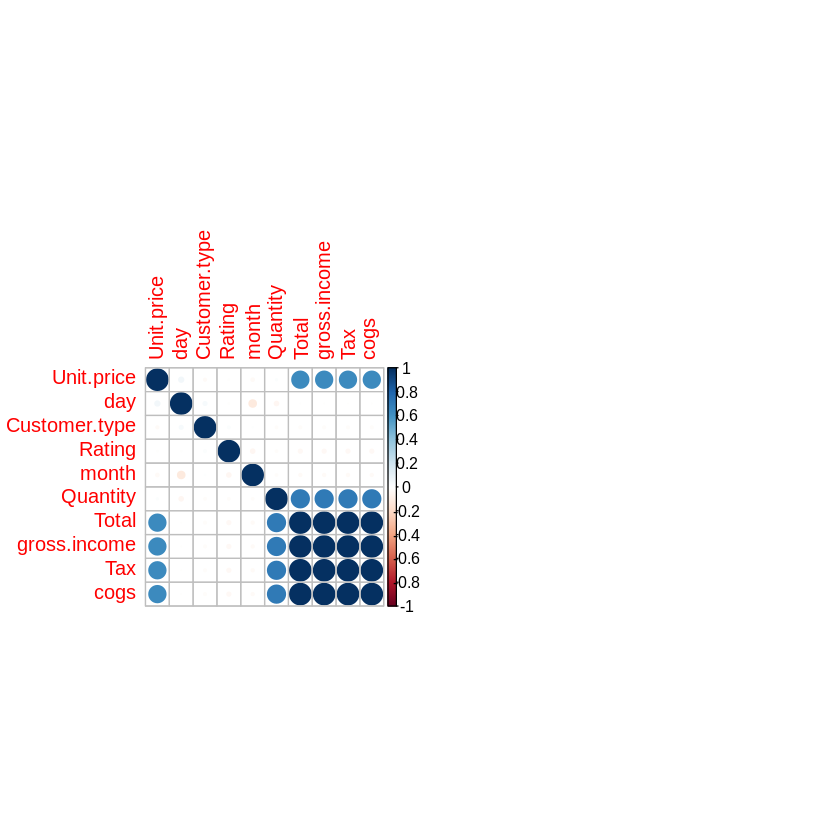

In [ ]:
# Plotting a graph to represent our dadaframe

par(mfrow = c(1, 2))

corrplot(corr, order = "hclust")

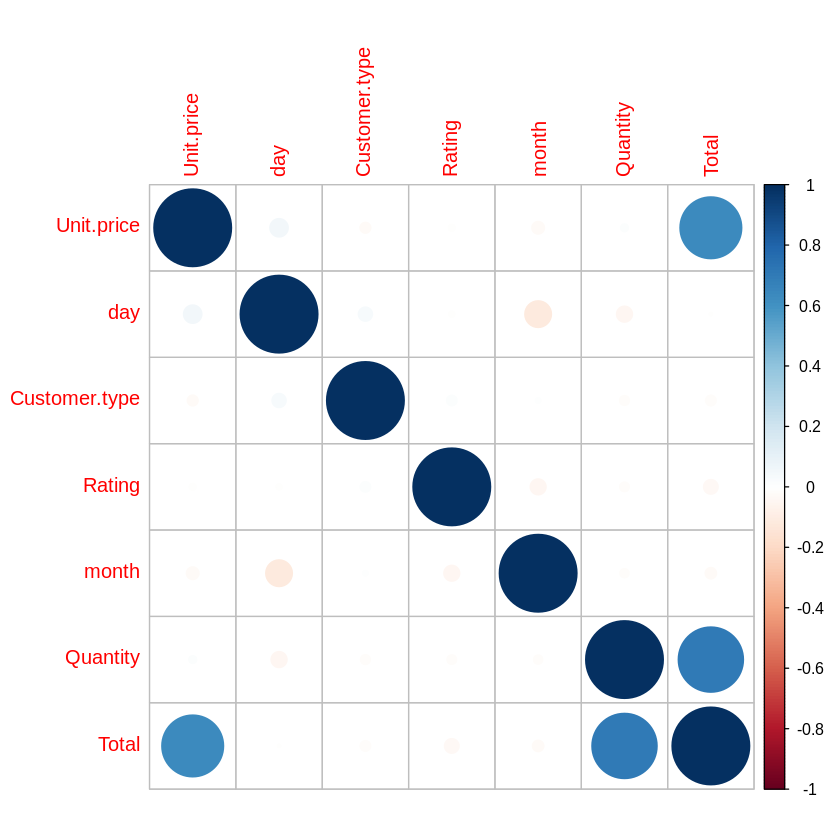

In [ ]:
# Plotting a graph

corrplot(cor(df), order = "hclust")

**I used the filter method for dimentionality reduction. The filter method dropped the cogs and tax variables**